In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mall customers.csv')

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df = df.drop('CustomerID', axis = 1)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
df = df.rename(columns = {'Age' : 'age', 'Annual Income (k$)' : 'income', 'Spending Score (1-100)' : 'score'})

In [15]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


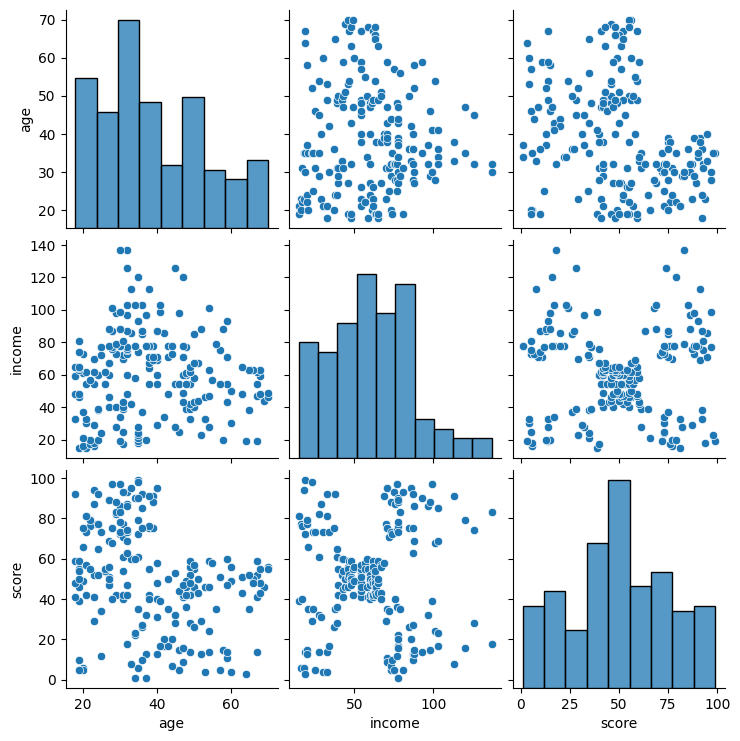

In [23]:
sns.pairplot(df[['age', 'income', 'score']])
plt.show()

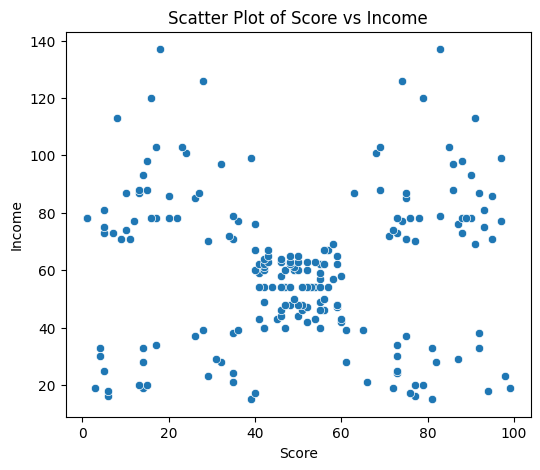

In [69]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='score', y='income')
plt.title('Scatter Plot of Score vs Income')
plt.xlabel('Score')
plt.ylabel('Income')
plt.show()

In [79]:
from sklearn.cluster import KMeans

In [81]:
km = KMeans(n_clusters=8)

In [83]:
km.fit(df[['score', 'income']])

KMeans()

In [87]:
df['new_cluster'] = km.predict(df[['score', 'income']])
df['new_cluster']

0      0
1      3
2      6
3      3
4      0
      ..
195    7
196    2
197    7
198    2
199    7
Name: new_cluster, Length: 200, dtype: int32

In [75]:
df

,Gender,age,income,score,new_cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,6
196,Female,45,126,28,4
197,Male,32,126,74,6
198,Male,32,137,18,4


In [93]:
df0 = df[df['new_cluster'] == 0]


In [51]:
df0.head()

,Gender,age,income,score,new_cluster
123,Male,39,69,91,0
125,Female,31,70,77,0
127,Male,40,71,95,0
129,Male,38,71,75,0
131,Male,39,71,75,0


In [89]:
df0.shape

(28, 5)

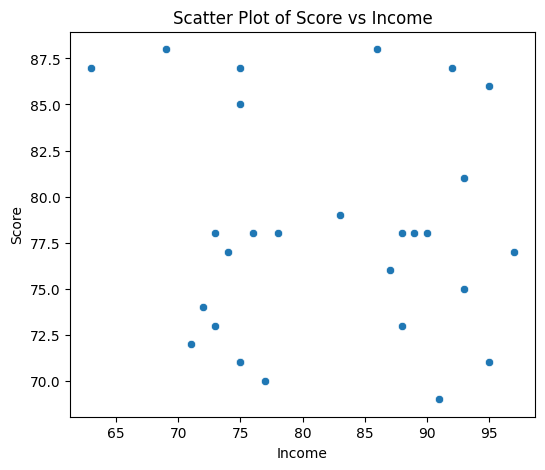

In [59]:

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df0, x='score', y='income')
plt.title('Scatter Plot of Score vs Income')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()


In [103]:
center = km.cluster_centers_
center

array([[ 35.86666667,  31.53333333],
       [ 81.89285714,  78.03571429],
       [ 22.        , 109.7       ],
       [ 79.36363636,  25.72727273],
       [ 17.42857143,  78.89285714],
       [ 50.40540541,  55.36486486],
       [  9.58333333,  24.58333333],
       [ 82.72727273, 108.18181818]])

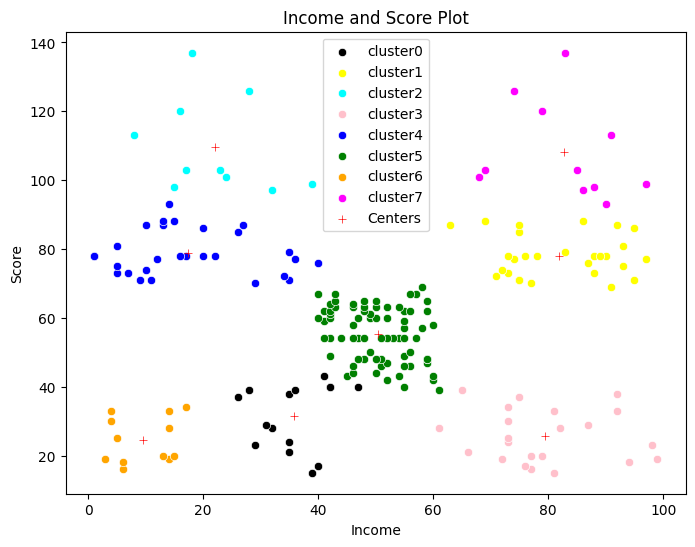

In [111]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df0, x='score', y='income', color='black', label='cluster0')
sns.scatterplot(data=df1, x='score', y='income', color='yellow', label='cluster1')
sns.scatterplot(data=df2, x='score', y='income', color='cyan', label='cluster2')
sns.scatterplot(data=df3, x='score', y='income', color='pink', label='cluster3')
sns.scatterplot(data=df4, x='score', y='income', color='blue', label='cluster4')
sns.scatterplot(data=df5, x='score', y='income', color='green', label='cluster5')
sns.scatterplot(data=df6, x='score', y='income', color='orange', label='cluster6')
sns.scatterplot(data=df7, x='score', y='income', color='magenta', label='cluster7')

# Plot cluster centers with proper keyword arguments
sns.scatterplot(x=center[:, 0], y=center[:, 1], color='red', marker='+',label='Centers')

plt.title('Income and Score Plot')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()


## optimizing K means

In [118]:
wss = []
cluster_range = range(1, 15)
for k in cluster_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income', 'score']])
    wss.append(km2.inertia_)

In [120]:
wss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 33869.428028278024,
 24990.4343103969,
 23243.148074793426,
 21752.597316017316,
 20292.474589096542,
 16122.217479012217,
 15124.89178988441,
 13177.948342653515]

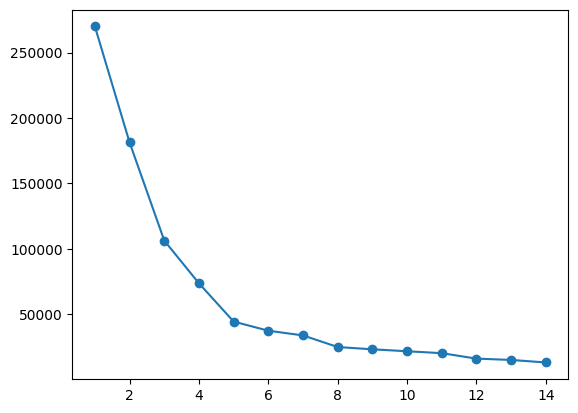

In [126]:
plt.plot(cluster_range, wss, marker ='o')
plt.show()